In [1]:
import pandas as pd
import sys
sys.path.append('/Users/AvyaTiK/Desktop/pyfed/')
from models.metrics.utils import *


In [2]:
#import the data 
#iid
test_loss1 = pd.read_csv('iid/Testing_loss_mnist_2020-07-02_20.19.31.820075.csv', delimiter=',')
test_accuracy1 = pd.read_csv('iid/Testing_accuracy_mnist_2020-07-02_20.19.31.820075.csv',delimiter=',')
training_loss1 = pd.read_csv('iid/Training_loss_mnist_2020-07-02_20.19.31.820075.csv',delimiter=',')

#non iid (random)
test_loss2 = pd.read_csv('niid_random/Testing_loss_mnist_2020-07-03_01.58.21.882391.csv', delimiter=',')
test_accuracy2 = pd.read_csv('niid_random/Testing_accuracy_mnist_2020-07-03_01.58.21.882391.csv',delimiter=',')
training_loss2 = pd.read_csv('niid_random/Training_loss_mnist_2020-07-03_01.58.21.882391.csv',delimiter=',')

#non iid (label split type 0)
test_loss3 = pd.read_csv('niid_label_type_0/Testing_loss_mnist_2020-07-03_03.28.42.796174.csv', delimiter=',')
test_accuracy3 = pd.read_csv('niid_label_type_0/Testing_accuracy_mnist_2020-07-03_03.28.42.796174.csv',delimiter=',')
training_loss3 = pd.read_csv('niid_label_type_0/Training_loss_mnist_2020-07-03_03.28.42.796174.csv',delimiter=',')

#non iid (label split type 1)
test_loss4 = pd.read_csv('niid_label_type_1/Testing_loss_mnist_2020-07-03_04.56.49.938235.csv', delimiter=',')
test_accuracy4 = pd.read_csv('niid_label_type_1/Testing_accuracy_mnist_2020-07-03_04.56.49.938235.csv',delimiter=',')
training_loss4 = pd.read_csv('niid_label_type_1/Training_loss_mnist_2020-07-03_04.56.49.938235.csv',delimiter=',')

#non iid (label split type 2)
test_loss5 = pd.read_csv('niid_label_type_2/Testing_loss_mnist_2020-07-03_11.31.45.731173.csv', delimiter=',')
test_accuracy5 = pd.read_csv('niid_label_type_2/Testing_accuracy_mnist_2020-07-03_11.31.45.731173.csv',delimiter=',')
training_loss5 = pd.read_csv('niid_label_type_2/Training_loss_mnist_2020-07-03_11.31.45.731173.csv',delimiter=',')


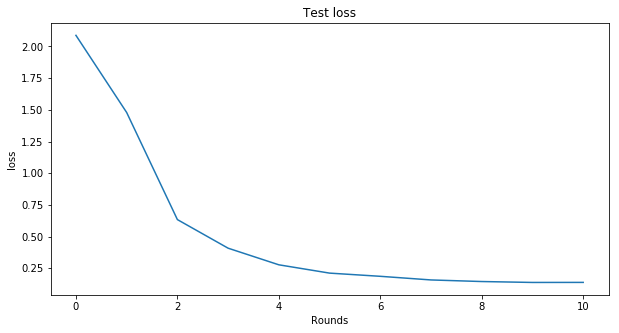

In [24]:
#plot the loss test
rounds = range(len(test_loss1))
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Test loss")
loss.plot(rounds,test_loss1.values)
plt.xlabel('Rounds')
plt.ylabel('loss')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

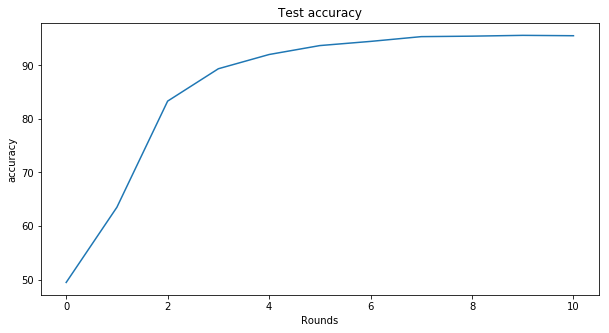

In [25]:
#plot the accuracy test
rounds = range(len(test_accuracy1))
fig, acc = plt.subplots(figsize=(10,5))
plt.title("Test accuracy")
acc.plot(rounds,test_accuracy1.values)
plt.xlabel('Rounds')
plt.ylabel('accuracy')
acc.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [26]:
print(test_accuracy.max())
print(test_loss.min())
len(test_loss)

NameError: name 'test_accuracy' is not defined

In [27]:
data = prepare_data(training_loss1)

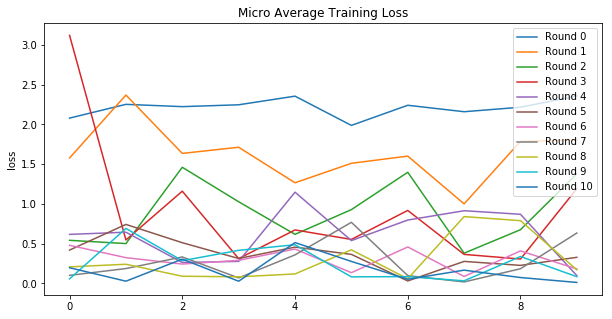

In [28]:
#plot the micro loss
fig = plt.figure(figsize=(10,5))
for i,d in enumerate(data):
    rounds = range(len(data)-1)
    plt.title("Micro Average Training Loss")
    plt.plot([data for data in d.values()], label="Round "+ str(i))
    plt.ylabel('loss')
    
plt.legend(loc='upper right')
plt.show()



In [29]:
#calculate the micro loss
loss_mic = micro_loss(data)

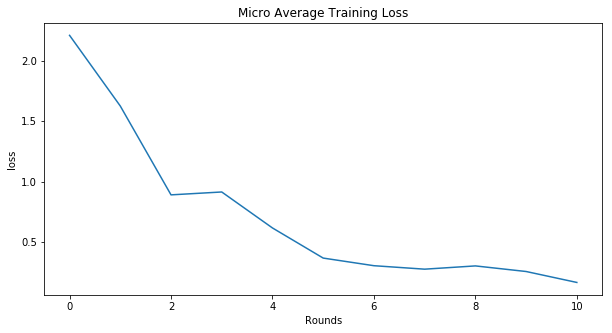

In [30]:
#plot the micro loss
rounds = range(len(loss_mic))
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Micro Average Training Loss")
loss.plot(rounds,loss_mic)
plt.xlabel('Rounds')
plt.ylabel('loss')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [31]:
#calculate the macro loss
data_size =[    3,   101,    72,    21,    25,   168,   105,    97,     7,
         145,    21,    98,     6,    39,    49,    24,    11,   134,
          96,    11,   167,    11,    88,    28,   162,    65,   140,
          32,    48,    69, 51601,   101,    44,   129,   109,    31,
          97,    80,    18,    10,   158,   164,    40,    30,    91,
           7,   105,    91,     5,    51,    46,    34,   138,   122,
          66,    91,    11,    81,   123,   144,   162,   102,   137,
         153,    97,   156,    72,    34,   140,    31,   168,    69,
         165,    49,    69,    28,   103,   118,   126,   110,    77,
         102,   156,   140,    73,   136,     3,   134,   169,   149,
         147,    63,   171,    39,    95,   163,    87,    21,    44,
          81]
loss_mac = macro_loss(data,data_size)

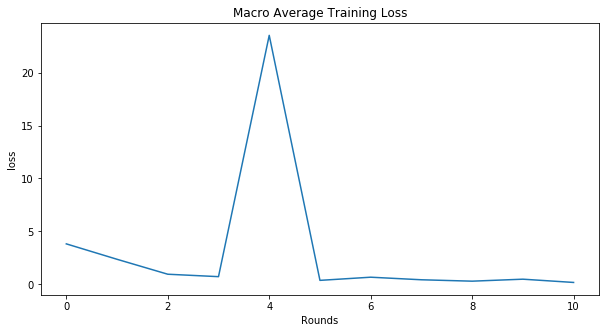

In [32]:
#plot the micro loss
rounds = range(len(loss_mac))
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Macro Average Training Loss")
loss.plot(rounds,loss_mac)
plt.xlabel('Rounds')
plt.ylabel('loss')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

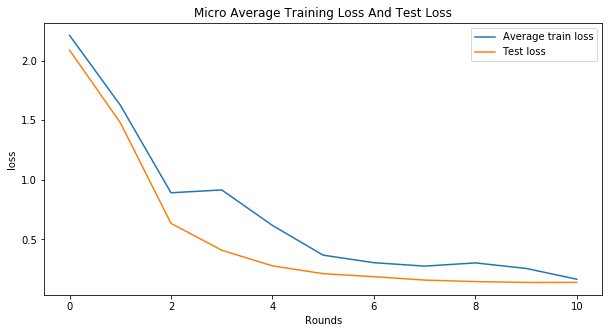

In [33]:
#plot the micro loss
rounds = range(len(test_loss1))
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Micro Average Training Loss And Test Loss")
loss.plot(rounds,loss_mic,label="Average train loss")
loss.plot(rounds,test_loss1,label="Test loss")
plt.xlabel('Rounds')
plt.ylabel('loss')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='upper right')
plt.show()

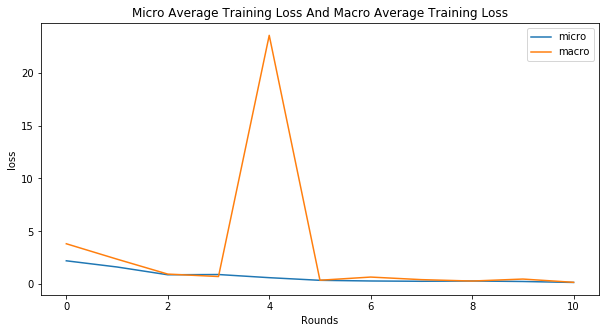

In [36]:
#plot the micro loss
rounds = range(len(test_loss1))
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Micro Average Training Loss And Macro Average Training Loss")
loss.plot(rounds,loss_mic,label="micro")
loss.plot(rounds,loss_mac,label="macro")
plt.xlabel('Rounds')
plt.ylabel('loss')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='upper right')
plt.show()

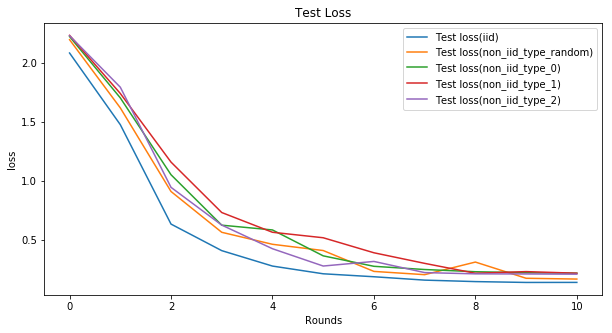

In [37]:
#plot the compare loss
rounds = range(len(test_loss1)-1)
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Test Loss")
loss.plot(test_loss1,label="Test loss(iid)")
loss.plot(test_loss2,label="Test loss(non_iid_type_random)")
loss.plot(test_loss3,label="Test loss(non_iid_type_0)")
loss.plot(test_loss4,label="Test loss(non_iid_type_1)")
loss.plot(test_loss5,label="Test loss(non_iid_type_2)")

plt.xlabel('Rounds')
plt.ylabel('loss')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='upper right')
plt.show()

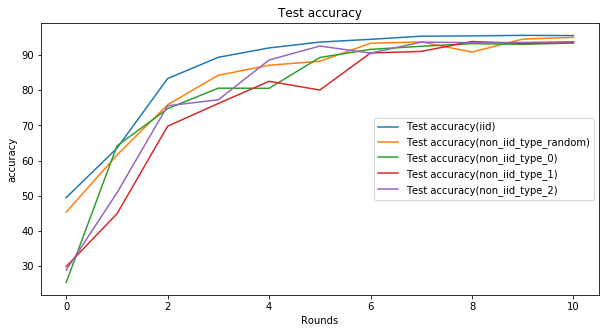

In [4]:
#plot the compare loss
rounds = range(len(test_loss1)-1)
fig, loss = plt.subplots(figsize=(10,5))
plt.title("Test accuracy")
loss.plot(test_accuracy1,label="Test accuracy(iid)")
loss.plot(test_accuracy2,label="Test accuracy(non_iid_type_random)")
loss.plot(test_accuracy3,label="Test accuracy(non_iid_type_0)")
loss.plot(test_accuracy4,label="Test accuracy(non_iid_type_1)")
loss.plot(test_accuracy5,label="Test accuracy(non_iid_type_2)")

plt.xlabel('Rounds')
plt.ylabel('accuracy')
loss.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='right')
plt.show()